In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
! zip -s- "/content/drive/My Drive/DATA-475/plant-seedlings-classification.zip" -O plant-seedlings-classification.zip
! unzip plant-seedlings-classification.zip -d plant-seedlings-classification

Streaming output truncated to the last 5000 lines.
  inflating: plant-seedlings-classification/test/b215531dd.png  
  inflating: plant-seedlings-classification/test/b2706e2b3.png  
  inflating: plant-seedlings-classification/test/b29339405.png  
  inflating: plant-seedlings-classification/test/b30ab4659.png  
  inflating: plant-seedlings-classification/test/b31292706.png  
  inflating: plant-seedlings-classification/test/b341d0aab.png  
  inflating: plant-seedlings-classification/test/b39c71707.png  
  inflating: plant-seedlings-classification/test/b3d6fdb80.png  
  inflating: plant-seedlings-classification/test/b3e08b037.png  
  inflating: plant-seedlings-classification/test/b47691c08.png  
  inflating: plant-seedlings-classification/test/b4c3df835.png  
  inflating: plant-seedlings-classification/test/b4f7c9214.png  
  inflating: plant-seedlings-classification/test/b573b7a56.png  
  inflating: plant-seedlings-classification/test/b5c7fd009.png  
  inflating: plant-seedlings-classifica

In [3]:
import os
import warnings
warnings.filterwarnings("ignore")

labels = os.listdir("plant-seedlings-classification/train")
print(labels)

['Common wheat', 'Scentless Mayweed', 'Black-grass', 'Charlock', 'Maize', 'Shepherds Purse', 'Fat Hen', 'Loose Silky-bent', 'Common Chickweed', 'Sugar beet', 'Small-flowered Cranesbill', 'Cleavers']


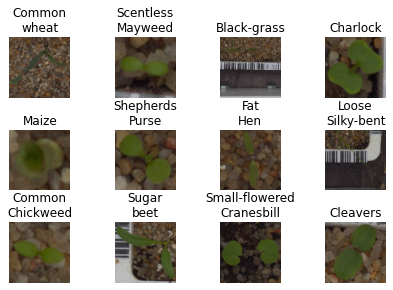

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


fig, axs = plt.subplots(nrows=3, ncols=4)
fig.tight_layout()
for index, label in enumerate(labels):
    image = np.random.choice(os.listdir(f"plant-seedlings-classification/train/{label}"))
    im = Image.open(f"plant-seedlings-classification/train/{label}/{image}")
    ind = int(index/4), index % 4
    axs[ind].imshow(im)
    axs[ind].set_title(label.replace(" ", "\n"))
    axs[ind].axis("off")

In [7]:
from fastai.vision import *
from fastai.metrics import accuracy

# Use from_folder factory method from ImageDataBunch to create a dataset
# configure: 
#   path
#   size
#   ds_tfms, to flip the image randomly and allow fliping vertically
#   valid_pct， 20%

path = "/content/plant-seedlings-classification"
size = 224
bs = 64

data = ImageDataBunch.from_folder(
    path,
    train="train",
    ds_tfms=get_transforms(do_flip=True, flip_vert=True),
    valid_pct=.2,
    size=size,
    bs=bs,
)


In [8]:
# normalize with imagenet_stats
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (4436 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
test,test,test,test,test
Path: /content/plant-seedlings-classification;

Valid: LabelList (1108 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sugar beet,Small-flowered Cranesbill,Fat Hen,Scentless Mayweed,test
Path: /content/plant-seedlings-classification;

Test: None

In [9]:
# create a CNN learner named "learner" with resnet34
learner = cnn_learner(data, models.resnet34, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03
Min loss divided by 10: 1.00E-02


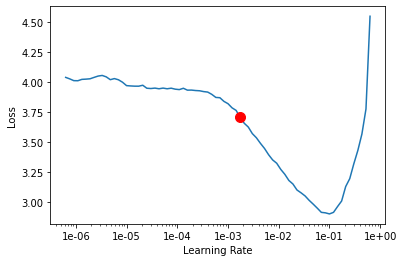

In [10]:
# find a learning rate
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [11]:
# fit one cycle
lr = learner.recorder.min_grad_lr
learner.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.894420,1.068641,0.658845,01:32


In [12]:
# interpret the result and see the most confused classess
interp = ClassificationInterpretation.from_learner(learner)
interp.most_confused(min_val=2)

[('Black-grass', 'Loose Silky-bent', 35),
 ('Fat Hen', 'test', 25),
 ('test', 'Loose Silky-bent', 16),
 ('test', 'Charlock', 15),
 ('test', 'Small-flowered Cranesbill', 15),
 ('Loose Silky-bent', 'Black-grass', 14),
 ('Common Chickweed', 'test', 11),
 ('test', 'Cleavers', 11),
 ('Charlock', 'test', 10),
 ('Common Chickweed', 'Scentless Mayweed', 8),
 ('Sugar beet', 'Maize', 8),
 ('Common Chickweed', 'Fat Hen', 7),
 ('Shepherds Purse', 'Common Chickweed', 7),
 ('test', 'Sugar beet', 7),
 ('Black-grass', 'Common wheat', 6),
 ('Scentless Mayweed', 'Loose Silky-bent', 6),
 ('Scentless Mayweed', 'Shepherds Purse', 6),
 ('Shepherds Purse', 'Small-flowered Cranesbill', 6),
 ('Shepherds Purse', 'test', 6),
 ('test', 'Fat Hen', 6),
 ('Cleavers', 'Scentless Mayweed', 5),
 ('Cleavers', 'test', 5),
 ('Scentless Mayweed', 'Common Chickweed', 5),
 ('Scentless Mayweed', 'test', 5),
 ('test', 'Maize', 5),
 ('test', 'Scentless Mayweed', 5),
 ('Common Chickweed', 'Shepherds Purse', 4),
 ('Common wheat',

In [13]:
# fine tune the model and check the result again
learner.unfreeze()
learner.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.239663,14.726074,0.287004,01:34
1,1.035650,1.338663,0.600181,01:35
2,0.827482,0.676179,0.740072,01:35
3,0.611952,0.433510,0.828520,01:33
4,0.487928,0.353783,0.851083,01:33
